## Обзор датасета

### Наш набор данных состоит из 18 признаков из 17880 наблюдений из разных стран. соответственно название, местоположение, отдел, диапазон зарплат, профиль компании, требования, льготы, удаленная работа (1 для remoute) есть логотип компании, есть вопрос, тип занятости, требуемый опыт, требуемое образование, отрасль, функция, мошенничество.
### Цель проекта:
### В этом наборе данных столбец "мошенничество" является нашим целевым столбцом (зависимой переменной). Остальные 17 столбцов являются нашими независимыми переменными. Мы попытаемся предсказать нашу зависимую переменную с помощью независимых переменных.

### Импорт

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('../content/drive/MyDrive/fake_post/fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


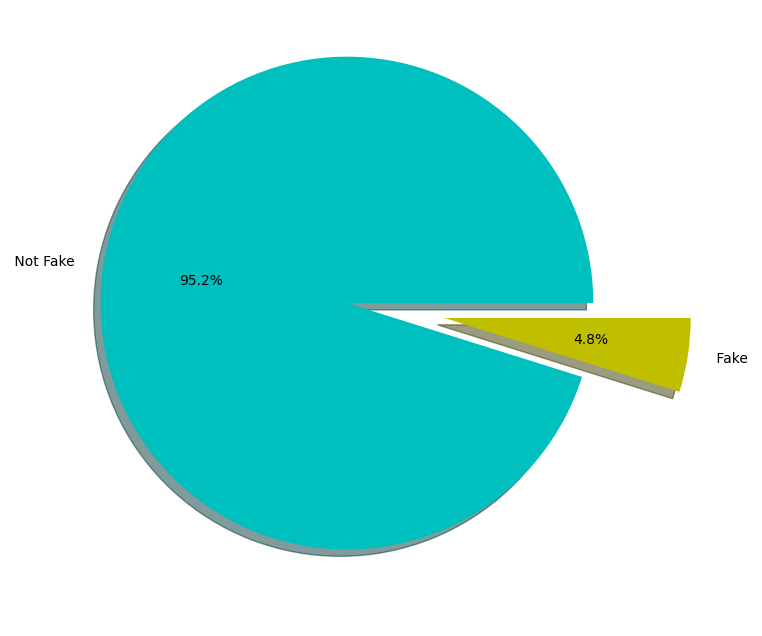

In [ ]:
y = [data[data['fraudulent']==0].shape[0] , data[data['fraudulent']==1].shape[0]]
mylabels = [" Not Fake " , " Fake "]
myexplode = [0.4, 0]
plt.figure(figsize=(12, 8))
plt.pie(y, labels = mylabels, explode = myexplode , autopct='%1.1f%%' , shadow = True , colors = ['c' , 'y'])
plt.show()

In [ ]:
def Information (data) :
    data.replace('?' , np.nan , inplace = True )
    nulls = (data.shape[0] - data.dropna(axis = 0).shape[0])
    nulls_per = (data.shape[0] - data.dropna(axis = 0).shape[0]) / data.shape[0]
    dup , dup_per = data.duplicated().sum() , (data.duplicated().sum()) / data.shape[0]
    numerical_columns = list((data.select_dtypes(include=np.number)).columns)
    categorical_columns = list(data.select_dtypes(include = ['object']).columns)
    numerical_col_dict = {}
    for col in numerical_columns :
        if data[col].nunique() > 10 :
            numerical_col_dict[col] = 'Continuous'

        else :
            numerical_col_dict[col] = 'Discrete'
    categorical_col_dict = {}
    for col in categorical_columns :
        if data[col].nunique() > 10 :
            categorical_col_dict[col] = 'Continuous'

        else :
            categorical_col_dict[col] = 'Classes'
    x = []
    for col in data.columns :
        x.append([col , data[col].unique() ,data[col].nunique(),data[col].dtype,data[col].isna().sum(),int((data[col].isna().sum())/data.shape[0] * 100)  ])

    x = pd.DataFrame(x ,columns=['Feature','Unique_Values','No.OfUniqueValues','DataType','NoOfNulls','Nulls %'])

    print('\n','There is : {}  Nulls, Representing {} % of The Data'.format(nulls , '%.2f'%nulls_per ))
    print('\n','There is : {}  Duplicated, Representing {} % of The Data'.format(dup , '%.2f'%dup_per))
    print('\n','Numerical Columns : {}'.format(numerical_col_dict))
    print('\n','Categorical Columns : {}'.format(categorical_col_dict))

    return x

In [ ]:
pd.options.display.max_rows = None
Information(data)


 There is : 17106  Nulls, Representing 0.96 % of The Data

 There is : 0  Duplicated, Representing 0.00 % of The Data

 Numerical Columns : {'job_id': 'Continuous', 'telecommuting': 'Discrete', 'has_company_logo': 'Discrete', 'has_questions': 'Discrete', 'fraudulent': 'Discrete'}

 Categorical Columns : {'title': 'Continuous', 'location': 'Continuous', 'department': 'Continuous', 'salary_range': 'Continuous', 'company_profile': 'Continuous', 'description': 'Continuous', 'requirements': 'Continuous', 'benefits': 'Continuous', 'employment_type': 'Classes', 'required_experience': 'Classes', 'required_education': 'Continuous', 'industry': 'Continuous', 'function': 'Continuous'}


,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,job_id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",17880,int64,0,0
1,title,"[Marketing Intern, Customer Service - Cloud Vi...",11231,object,0,0
2,location,"[US, NY, New York, NZ, , Auckland, US, IA, Wev...",3105,object,346,1
3,department,"[Marketing, Success, nan, Sales, ANDROIDPIT, H...",1337,object,11547,64
4,salary_range,"[nan, 20000-28000, 100000-120000, 120000-15000...",874,object,15012,83
5,company_profile,"[We're Food52, and we've created a groundbreak...",1709,object,3308,18
6,description,"[Food52, a fast-growing, James Beard Award-win...",14801,object,1,0
7,requirements,[Experience with content management systems a ...,11968,object,2695,15
8,benefits,"[nan, What you will get from usThrough being p...",6205,object,7210,40
9,telecommuting,"[0, 1]",2,int64,0,0


In [ ]:
data.drop('job_id' , axis = 1 ,inplace = True)

In [ ]:
pd.options.display.max_rows = 10
data

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
data.reset_index(drop=True ,inplace=True)

Impute Nulls

In [ ]:
data['location'] = data['location'].fillna(value = data['location'].value_counts().index[0] )

In [ ]:
for idx in (data[data['department'].isna()]['title'].index) :
    if 'Marketing' in data.at[idx ,'title' ] :
        data.at[idx , 'department'] = 'Marketing'
    elif 'Sales' in data.at[idx ,'title' ] :
        data.at[idx , 'department'] = 'Sales'
    elif ('Accountant' in data.at[idx ,'title' ])|('Accounting' in data.at[idx ,'title' ] ) :
        data.at[idx , 'department'] = 'Accounting'
    elif ('Engineer' in data.at[idx ,'title' ] )|('Engineering' in data.at[idx ,'title' ] ) :
        data.at[idx , 'department'] = 'Engineering'
    else :
        data.at[idx , 'department'] = data.at[idx , 'title']

In [ ]:
for idx in (data['salary_range'].dropna()).index :
    Range = data.at[idx , 'salary_range'].split('-')
    try :
        start = int(Range[0])
        if start < 1000 :
            data.at[idx ,'salary_range' ] = 0
        else :
            data.at[idx ,'salary_range' ] = start

    except ValueError :
        data.at[idx ,'salary_range' ] = 0

data['salary_range'] = data['salary_range'].fillna(0)

In [ ]:
data

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Commissioning Machinery Assistant (CMA),0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Bill Review Manager,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,0,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Engineering,0,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",Graphic Designer,0,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
data[['company_profile' , 'description','requirements','benefits']] = data[['company_profile' , 'description','requirements','benefits']].fillna('no available data')

In [ ]:
pd.options.display.max_rows = None
Information(data)


 There is : 10265  Nulls, Representing 0.57 % of The Data

 There is : 285  Duplicated, Representing 0.02 % of The Data

 Numerical Columns : {'salary_range': 'Continuous', 'telecommuting': 'Discrete', 'has_company_logo': 'Discrete', 'has_questions': 'Discrete', 'fraudulent': 'Discrete'}

 Categorical Columns : {'title': 'Continuous', 'location': 'Continuous', 'department': 'Continuous', 'company_profile': 'Continuous', 'description': 'Continuous', 'requirements': 'Continuous', 'benefits': 'Continuous', 'employment_type': 'Classes', 'required_experience': 'Classes', 'required_education': 'Continuous', 'industry': 'Continuous', 'function': 'Continuous'}


,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,title,"[Marketing Intern, Customer Service - Cloud Vi...",11231,object,0,0
1,location,"[US, NY, New York, NZ, , Auckland, US, IA, Wev...",3105,object,0,0
2,department,"[Marketing, Success, Commissioning Machinery A...",7151,object,0,0
3,salary_range,"[0, 20000, 100000, 120000, 50000, 40000, 65000...",189,int64,0,0
4,company_profile,"[We're Food52, and we've created a groundbreak...",1710,object,0,0
5,description,"[Food52, a fast-growing, James Beard Award-win...",14802,object,0,0
6,requirements,[Experience with content management systems a ...,11969,object,0,0
7,benefits,"[no available data, What you will get from usT...",6206,object,0,0
8,telecommuting,"[0, 1]",2,int64,0,0
9,has_company_logo,"[1, 0]",2,int64,0,0


In [ ]:
data[['industry' , 'function']] = data[['industry' , 'function']].fillna('')
data['job_field'] = data['title'] +' '+ data['department'] +' '+ data['industry'] +' '+ data['function']
data.drop(['title','department','industry','function'] , axis = 1 , inplace = True )

In [ ]:
pd.options.display.max_rows = None
Information(data)


 There is : 9546  Nulls, Representing 0.53 % of The Data

 There is : 285  Duplicated, Representing 0.02 % of The Data

 Numerical Columns : {'salary_range': 'Continuous', 'telecommuting': 'Discrete', 'has_company_logo': 'Discrete', 'has_questions': 'Discrete', 'fraudulent': 'Discrete'}

 Categorical Columns : {'location': 'Continuous', 'company_profile': 'Continuous', 'description': 'Continuous', 'requirements': 'Continuous', 'benefits': 'Continuous', 'employment_type': 'Classes', 'required_experience': 'Classes', 'required_education': 'Continuous', 'job_field': 'Continuous'}


,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,location,"[US, NY, New York, NZ, , Auckland, US, IA, Wev...",3105,object,0,0
1,salary_range,"[0, 20000, 100000, 120000, 50000, 40000, 65000...",189,int64,0,0
2,company_profile,"[We're Food52, and we've created a groundbreak...",1710,object,0,0
3,description,"[Food52, a fast-growing, James Beard Award-win...",14802,object,0,0
4,requirements,[Experience with content management systems a ...,11969,object,0,0
5,benefits,"[no available data, What you will get from usT...",6206,object,0,0
6,telecommuting,"[0, 1]",2,int64,0,0
7,has_company_logo,"[1, 0]",2,int64,0,0
8,has_questions,"[0, 1]",2,int64,0,0
9,employment_type,"[Other, Full-time, nan, Part-time, Contract, T...",5,object,3471,19


In [ ]:
data[['employment_type','required_experience','required_education']] = data[['employment_type','required_experience','required_education']].fillna('Other')

In [ ]:
data['Requirements'] = data['requirements'] +' ' + data['required_experience'] +' ' + data['required_education']
data.drop(['requirements','required_experience','required_education'],axis =  1 ,inplace = True )

In [ ]:
pd.options.display.max_rows = None
Information(data)


 There is : 0  Nulls, Representing 0.00 % of The Data

 There is : 285  Duplicated, Representing 0.02 % of The Data

 Numerical Columns : {'salary_range': 'Continuous', 'telecommuting': 'Discrete', 'has_company_logo': 'Discrete', 'has_questions': 'Discrete', 'fraudulent': 'Discrete'}

 Categorical Columns : {'location': 'Continuous', 'company_profile': 'Continuous', 'description': 'Continuous', 'benefits': 'Continuous', 'employment_type': 'Classes', 'job_field': 'Continuous', 'Requirements': 'Continuous'}


,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,location,"[US, NY, New York, NZ, , Auckland, US, IA, Wev...",3105,object,0,0
1,salary_range,"[0, 20000, 100000, 120000, 50000, 40000, 65000...",189,int64,0,0
2,company_profile,"[We're Food52, and we've created a groundbreak...",1710,object,0,0
3,description,"[Food52, a fast-growing, James Beard Award-win...",14802,object,0,0
4,benefits,"[no available data, What you will get from usT...",6206,object,0,0
5,telecommuting,"[0, 1]",2,int64,0,0
6,has_company_logo,"[1, 0]",2,int64,0,0
7,has_questions,"[0, 1]",2,int64,0,0
8,employment_type,"[Other, Full-time, Part-time, Contract, Tempor...",5,object,0,0
9,fraudulent,"[0, 1]",2,int64,0,0


In [ ]:
pd.options.display.max_rows = 10

Text Preprocessing

In [ ]:
import re
import nltk.corpus
import string
import nltk.stem
punc = string.punctuation
lmt = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')
s_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
class TextPreprocessing() :
    def __init__(self, data : pd.DataFrame = pd.DataFrame) :
        self.data = data


    def Clean(self , data) :
        self.data = data
        data_copy = data.copy(deep = True)
        text_cols = list(data_copy.select_dtypes(include = ['object']).columns)
        for col in text_cols :
            for idx, text in enumerate(data_copy[col]) :
                te = []
                word = re.sub(r'(@|#)\w+' , '' , text)
                word = re.sub("[,.]", "", word)
                word = re.sub(r'https?://\S+' , '' , word)
                word = re.sub(r'(\?|!)+' , '' , word)
                word = re.sub(r"\(|\)", "", word)
                word = re.sub(r'(^\s+)' , '' , word)
                word = re.sub(r'(\s+$)' , '' , word)
                word = re.sub(r'\d+' , '' , word)
                word = word.split()
                for i in word :
                    if (i not in s_words) & (i not in punc) :
                        i = i.lower()
                        i = lmt.lemmatize(i , 'v')
                        te.append(i)
                data_copy.at[idx , col] = te
        return data_copy

    def Vactorize (self, data , target_name) :
        self.data = data
        self.target_name = target_name
        data_cleaned = data.copy(deep = True)
        text_cols = list(data_cleaned.select_dtypes(include = ['object']).columns)
        pos_word = {}
        neg_word = {}

        pos_data = data_cleaned[data_cleaned[target_name] == 1].reset_index(drop=True)
        neg_data = data_cleaned[data_cleaned[target_name] == 0].reset_index(drop=True)

        for col in text_cols :

            pos_word[col] = [word for sublist in pos_data[col] for word in sublist]
            neg_word[col] = [word for sublist in neg_data[col] for word in sublist]



        pos_freq = {}
        neg_freq = {}
        for key in pos_word.keys() :
            positive_dict = {}
            for word in pos_word[key] :
                positive_dict[word] = positive_dict.get(word , 0) + 1

            pos_freq[key] = positive_dict


        for key in neg_word.keys() :
            negative_dict = {}
            for word in neg_word[key] :
                negative_dict[word] = negative_dict.get(word , 0) + 1

            neg_freq[key] = negative_dict

        return pos_freq , neg_freq




    def Vactorization (self , data , target_name) :
        self.data = data
        self.target_name = target_name
        data_cleaned = data.copy(deep = True)
        text_cols = list(data_cleaned.select_dtypes(include = ['object']).columns)
        pos_freq , neg_freq = TextPreprocessing().Vactorize(data_cleaned , target_name)

        for col in text_cols :
            data_cleaned['{}_pos'.format(col)] = 0
            data_cleaned['{}_neg'.format(col)] = 0
            for idx, List in enumerate(data_cleaned[col]) :
                pos_frequent = 0
                neg_frequent = 0
                for word in List :
                    pos_frequent += pos_freq[col].get(word , 0)
                    neg_frequent += neg_freq[col].get(word , 0)



                data_cleaned.at[idx ,'{}_pos'.format(col)] = pos_frequent
                data_cleaned.at[idx ,'{}_neg'.format(col)] = neg_frequent
            data_cleaned.drop([col] , axis = 1 , inplace = True)
        return data_cleaned


    def fit_transform(self , data , target_name) :
        self.data = data
        self.target_name = target_name

        data_cleaned = TextPreprocessing().Clean(data)
        data_vact = TextPreprocessing().Vactorization(data_cleaned , target_name)

        return data_vact


    def Naive_Bayes(self , data, target_name) :
        self.data = data
        self.target_name = target_name
        data_naive = TextPreprocessing().Clean(data)
        pos_freq , neg_freq = TextPreprocessing().Vactorize(data_naive , target_name)
        text_cols = list(data_naive.select_dtypes(include = ['object']).columns)

        v_n_pos , v_n_neg = {} , {}

        for key in pos_freq.keys() :
            v_n_pos[key] = len(pos_freq[key])
            n = 0
            for word in pos_freq[key] :
                n += pos_freq[key].get(word , 0)
            v_n_pos[key]+=n
        for key in neg_freq.keys() :
            v_n_neg[key] = len(neg_freq[key])
            n = 0
            for word in neg_freq[key] :
                n += neg_freq[key].get(word , 0)
            v_n_neg[key]+=n


        prob_pos_dict = {}
        for key in pos_freq.keys():
            positive_dict = {}
            for word in pos_freq[key] :
                positive_dict[word] = (pos_freq[key].get(word , 0) + 1) / (v_n_pos[key])
            prob_pos_dict[key] = positive_dict




        prob_neg_dict = {}
        for key in neg_freq.keys():
            negative_dict = {}
            for word in neg_freq[key] :
                negative_dict[word] = (neg_freq[key].get(word , 0) + 1) / (v_n_neg[key])
            prob_neg_dict[key] = negative_dict



        for col in text_cols :
            data_naive['{}_probs'.format(col)] = 0
            for idx, List in enumerate(data_naive[col]) :
                score = 0
                for word in List :
                    try :
                        b = np.log((prob_pos_dict[col].get(word , 0)) / (prob_neg_dict[col].get(word , 0)))
                        if b == -float('inf') :
                            pass
                        else :
                            score +=b
                    except :
                        pass

                data_naive['{}_probs'.format(col)][idx] = score
            data_naive.drop([col] , axis = 1 , inplace = True)


        return {'probs_pos':prob_pos_dict ,'probs_neg':prob_neg_dict } , data_naive

Clean Text

In [ ]:
pre = TextPreprocessing()
data_cleaned = pre.Clean(data)
data_cleaned

In [ ]:
data_cleaned['location'][0]

['us', 'ny', 'new', 'york']

Подход 1. Метод векторизации.

In [ ]:
data_cleaned = pre.Vactorization(data_cleaned , target_name = 'fraudulent')
data_cleaned

fit_transform выполняет очистку и векторизацию вместе

In [ ]:
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier ,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score ,classification_report, r2_score ,confusion_matrix

In [ ]:
x = data_cleaned.drop(['fraudulent'] , axis = 1)
y = data_cleaned['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
list_of_models = [LogisticRegression() , KNeighborsClassifier() ,
                  DecisionTreeClassifier() ,ExtraTreeClassifier(), RandomForestClassifier(),ExtraTreesClassifier()]
classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

for model in list_of_models :
    model = model.fit(x_train , y_train)
    for i in range(2) :
        if i == 0 :
            to_pred = x_train
            pred = y_train
            title = 'Train'

        else :
            to_pred = x_test
            pred = y_test
            title = 'Test'
        y_pred = model.predict(to_pred)
        acc = round(accuracy_score(pred , y_pred)*100)
        f1 = round(f1_score(pred , y_pred)*100)
        prec = round(precision_score(pred , y_pred)*100)
        recall = round(recall_score(pred , y_pred)*100)
        d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4)
                     , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])
        classification_report = pd.concat([classification_report , d])
        classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )
pd.options.display.max_rows = 15
classification_report

,Accuracy,F1_score,Precision,Recall
LogisticRegression() _ Train Details,98,68,88,55
LogisticRegression() _ Test Details,98,73,90,61
KNeighborsClassifier() _ Train Details,98,72,85,62
KNeighborsClassifier() _ Test Details,97,64,75,56
DecisionTreeClassifier() _ Train Details,100,100,100,100
DecisionTreeClassifier() _ Test Details,97,71,73,70
ExtraTreeClassifier() _ Train Details,100,100,100,100
ExtraTreeClassifier() _ Test Details,96,62,60,64
RandomForestClassifier() _ Train Details,100,100,100,100
RandomForestClassifier() _ Test Details,98,74,98,60


In [ ]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(x_train , y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
from sklearn.metrics import classification_report
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_report = classification_report(y_train , y_train_pred)
test_report = classification_report(y_test , y_test_pred)

print('Train Report', '\n', train_report)
print('Test Report', '\n', test_report)

Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11921
           1       1.00      1.00      1.00       595

    accuracy                           1.00     12516
   macro avg       1.00      1.00      1.00     12516
weighted avg       1.00      1.00      1.00     12516

Test Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      5093
           1       0.96      0.60      0.74       271

    accuracy                           0.98      5364
   macro avg       0.97      0.80      0.86      5364
weighted avg       0.98      0.98      0.98      5364



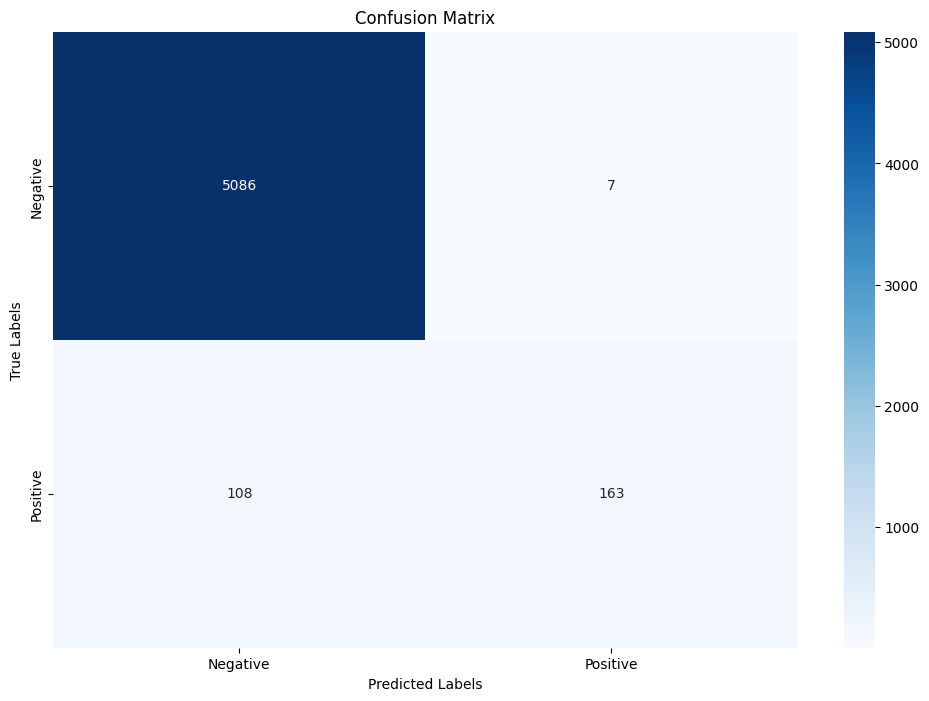

In [ ]:
plt.figure(figsize=(12,8))

conf_matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

labels = ['Negative', 'Positive']
plt.xticks(np.arange(len(labels))+0.5, labels)
plt.yticks(np.arange(len(labels))+0.5, labels)

plt.show()

Подход 2. Наивный байесовский классификатор

In [ ]:
proba , data_naive = pre.Naive_Bayes(data , target_name='fraudulent')

In [ ]:
len(proba)

2

In [ ]:
data_naive

,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,location_probs,company_profile_probs,description_probs,benefits_probs,employment_type_probs,job_field_probs,Requirements_probs
0,0,0,1,0,0,-0.737971,-17.654849,-16.313300,0.199597,0.377421,-3.559181,-4.487759
1,0,0,1,0,0,0.000000,-4.910586,-43.570776,3.974589,-0.148601,-1.883931,-24.693125
2,0,0,1,0,0,0.157113,-1.837206,1.609073,0.199597,0.377421,2.240216,24.970182
3,0,0,1,0,0,-1.451336,0.291504,-52.335503,-15.338880,-0.148601,-3.703835,-13.423200
4,0,0,1,1,0,2.211240,-13.015182,23.509370,0.733267,-0.148601,-2.199577,-3.549791
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,0,1,1,0,-0.091063,-64.594746,-52.869796,-19.275939,-0.148601,-2.341076,-15.405430
17876,0,0,1,1,0,0.273745,-28.566503,22.815193,-8.731849,-0.148601,6.117844,15.256880
17877,0,0,0,0,0,3.706812,-9.822105,29.158548,0.199597,-0.148601,7.571205,-18.144719
17878,0,0,0,1,0,0.456934,4.184395,-19.721938,-5.690263,-0.521367,-5.597253,-1.259510


Корреляционная матрица

In [ ]:
fake = data_naive.fraudulent
del data_naive['fraudulent']
data_naive['fraudulent'] = fake

In [ ]:
corr_matrix = data_naive.corr()
plt.figure(figsize=(150, 100))
sns.set_theme(font_scale=7)

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(corr_matrix)] = True

sns.set_theme(style="whitegrid", font_scale=3.5)

ax= sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="Reds",
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=.1,
    cbar_kws={"shrink": .82},
    annot=True,
    fmt='.2',
    annot_kws={"size": 35}
)

plt.show()

In [ ]:
x = data_naive.drop(['fraudulent'] , axis = 1)
y = data_naive['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 42)

In [ ]:
model = RandomForestClassifier(n_estimators=500 , n_jobs=-1)
model.fit(x_train , y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [ ]:
from sklearn.metrics import classification_report
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_report = classification_report(y_train , y_train_pred)
test_report = classification_report(y_test , y_test_pred)

print('Train Report', '\n', train_report)
print('Test Report', '\n', test_report)

Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11921
           1       1.00      1.00      1.00       595

    accuracy                           1.00     12516
   macro avg       1.00      1.00      1.00     12516
weighted avg       1.00      1.00      1.00     12516

Test Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5093
           1       0.93      0.83      0.87       271

    accuracy                           0.99      5364
   macro avg       0.96      0.91      0.93      5364
weighted avg       0.99      0.99      0.99      5364



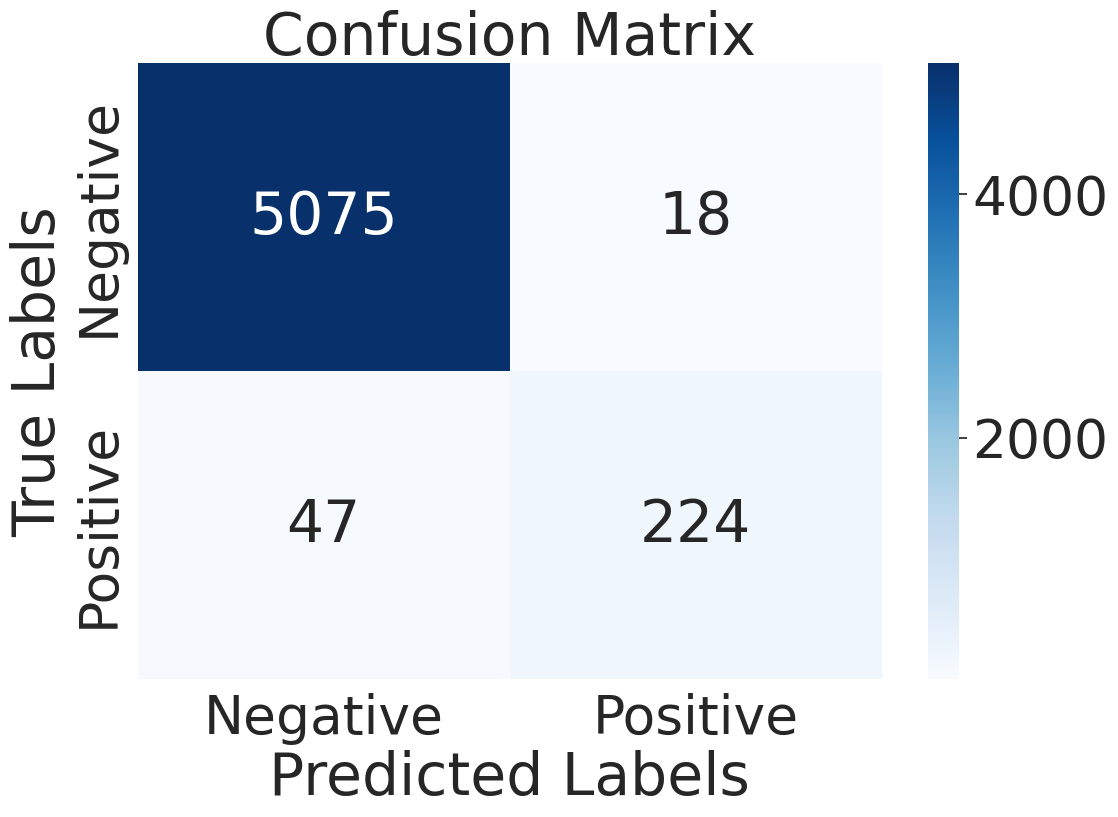

In [ ]:
plt.figure(figsize=(12,8))

conf_matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

labels = ['Negative', 'Positive']
plt.xticks(np.arange(len(labels))+0.5, labels)
plt.yticks(np.arange(len(labels))+0.5, labels)

plt.show();